In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df=pd.read_csv('Forest Fire updated 1.csv',header=1)

In [3]:
df.shape

(244, 14)

In [4]:
df.head()

,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
3,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
4,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   1         244 non-null    object
 1   6         244 non-null    object
 2   2012      244 non-null    object
 3   29        244 non-null    object
 4   57        244 non-null    object
 5   18        244 non-null    object
 6   0         244 non-null    object
 7   65.7      244 non-null    object
 8   3.4       244 non-null    object
 9   7.6       244 non-null    object
 10  1.3       244 non-null    object
 11  3.4.1     244 non-null    object
 12  0.5       244 non-null    object
 13  not fire  243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


## Data Cleaning

In [6]:
df[df.isnull().any(axis=1)]

,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
# The dataset is converted inot two sets based on region from 123 index, we can make a new column based on the region.
# 1. Bejaia Region Dataset
# 2. Sidi- Be Abbes Region Dataset
df.loc[:121,'Region']=0
df.loc[121:,'Region']=1

In [8]:
df['Region']=df['Region'].astype(int)

In [9]:
df.rename(columns={'1':'day','6':'month','2012':'year','29':'Temperature','57':'RH','18':'Ws','0':'Rain','65.7':'FFMC','3.4':'DMC',
                  '7.6':'DC','1.3':'ISI','3.4.1':'BUI','0.5':'FWI','not fire':'Classes'},inplace=True)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
3,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,0


In [11]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
# remove the 121th row
df=df.drop(121).reset_index(drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    object
 1   month        242 non-null    object
 2   year         242 non-null    object
 3   Temperature  242 non-null    object
 4   RH           242 non-null    object
 5   Ws           242 non-null    object
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.5+ KB


In [18]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    int64 
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.5+ KB


In [20]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [21]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [22]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [24]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.165289,62.061983,15.483471,0.766116,77.892562,14.727273,49.603719,4.756612,16.745455,7.062397,0.500000
std,8.809501,1.112888,0.0,3.629860,14.855329,2.812564,2.006754,14.358005,12.397360,47.688015,4.156909,14.232078,7.444045,0.501036
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
# lets save the cleaned dataset
df.to_csv('forest_fire_cleaned_dataset.csv',index=False)

## Exploratory Data Analysis

In [26]:
df_copy=df.drop(['day','month','year'],axis=1)

In [27]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [28]:
df_copy['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [29]:
df_copy['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [30]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [31]:
df['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

/tmp/ipykernel_320/1497677876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


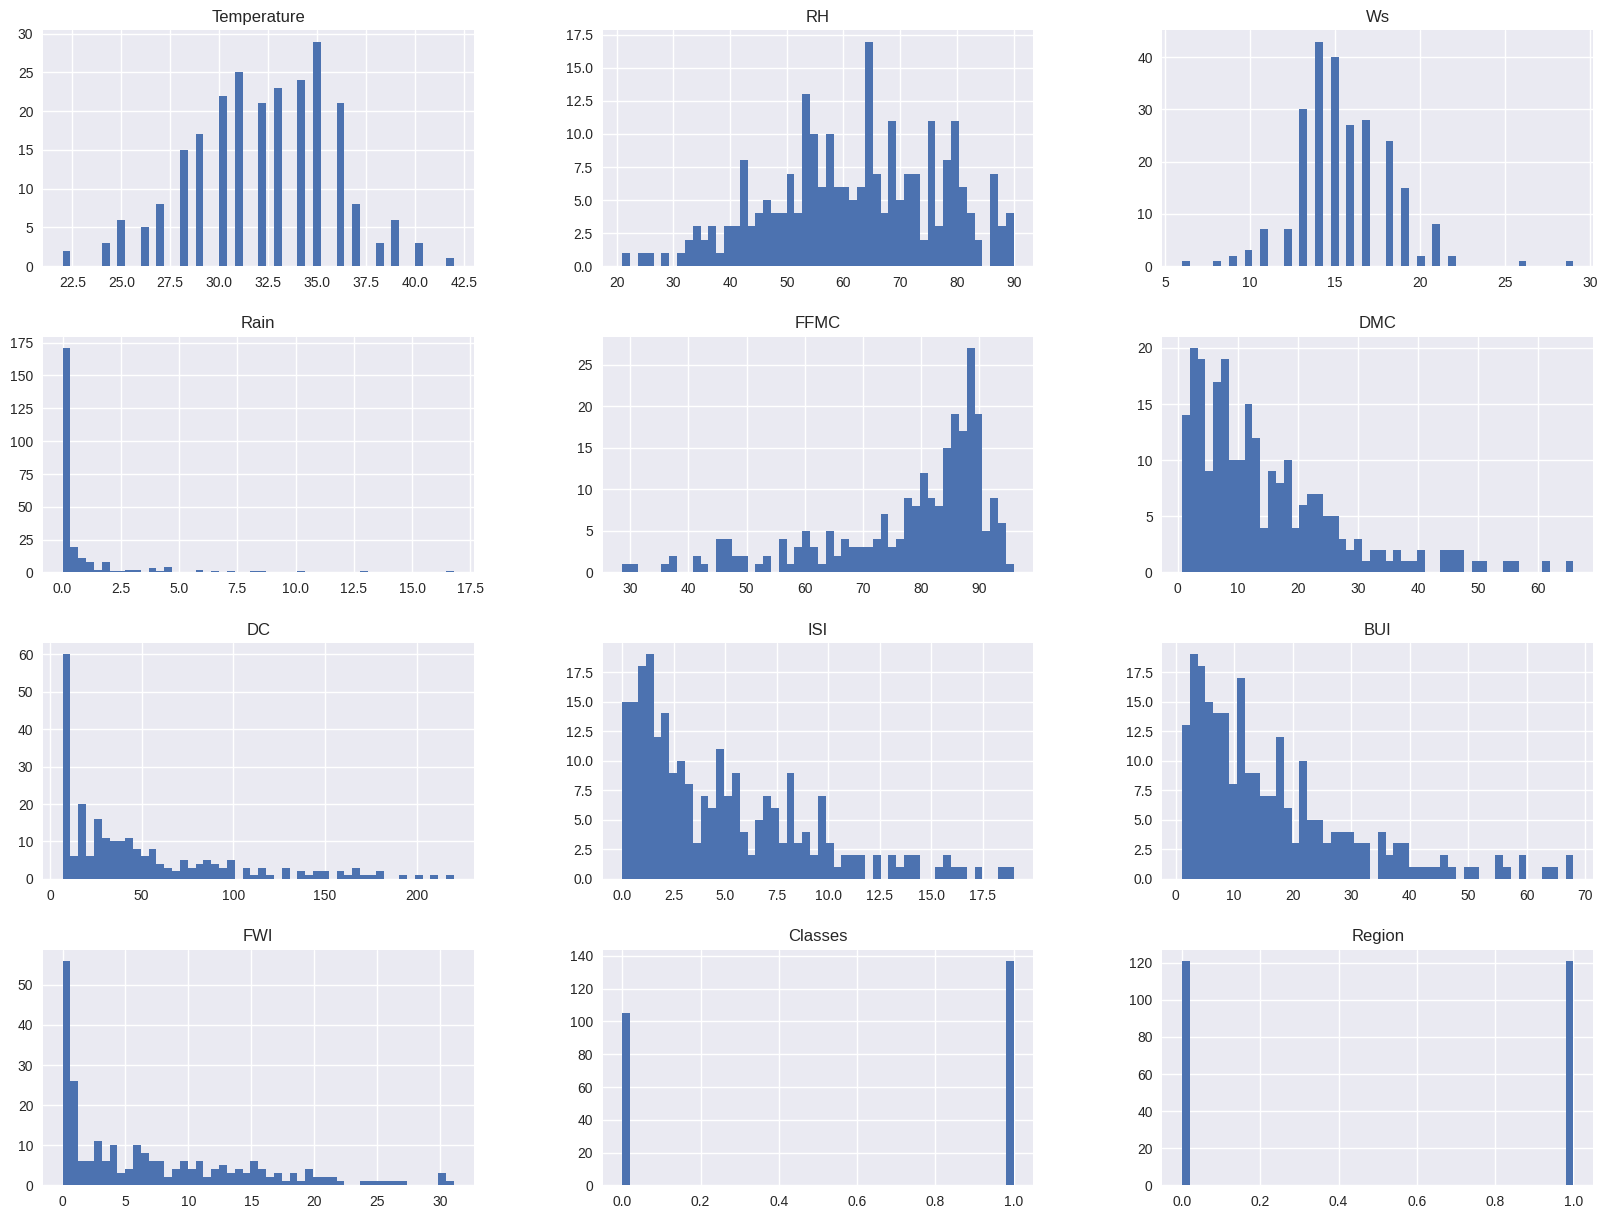

In [32]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [33]:
## Percentage pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [34]:
percentage

1    56.61157
0    43.38843
Name: Classes, dtype: float64

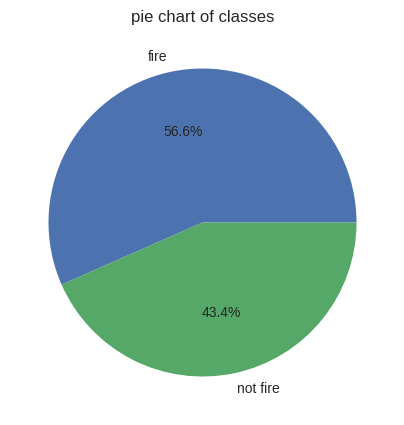

In [35]:
## plotting piechart
classlables=['fire','not fire']
plt.figure(figsize=(12,5))
plt.pie(percentage,labels=classlables,autopct='%1.1f%%')  # autopct='%1.1f%%' will show the percentage on the graph
plt.title('pie chart of classes')
plt.show()

## Correlation

In [36]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.653807,-0.282203,-0.328479,0.675579,0.483995,0.374304,0.602686,0.457968,0.565293,0.514104,0.266938
RH,-0.653807,1.000000,0.245770,0.221939,-0.647184,-0.410608,-0.228599,-0.688983,-0.355888,-0.583270,-0.435028,-0.405011
Ws,-0.282203,0.245770,1.000000,0.173253,-0.163932,0.002655,0.082649,0.011632,0.035015,0.035733,-0.066053,-0.178142
Rain,-0.328479,0.221939,0.173253,1.000000,-0.546220,-0.290799,-0.299980,-0.349397,-0.301966,-0.326431,-0.382026,-0.041681
FFMC,0.675579,-0.647184,-0.163932,-0.546220,1.000000,0.602342,0.505875,0.739249,0.590678,0.690178,0.768704,0.219527
DMC,0.483995,-0.410608,0.002655,-0.290799,0.602342,1.000000,0.875514,0.679461,0.982187,0.875453,0.583936,0.189048
DC,0.374304,-0.228599,0.082649,-0.299980,0.505875,0.875514,1.000000,0.507159,0.941797,0.738685,0.509166,-0.082654
ISI,0.602686,-0.688983,0.011632,-0.349397,0.739249,0.679461,0.507159,1.000000,0.642961,0.922666,0.734304,0.260686
BUI,0.457968,-0.355888,0.035015,-0.301966,0.590678,0.982187,0.941797,0.642961,1.000000,0.857494,0.584863,0.085888
FWI,0.565293,-0.583270,0.035733,-0.326431,0.690178,0.875453,0.738685,0.922666,0.857494,1.000000,0.718149,0.194189


/tmp/ipykernel_320/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

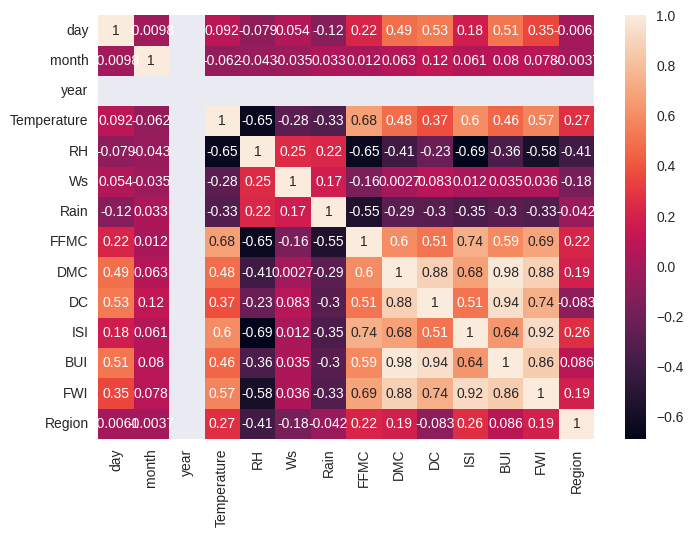

In [37]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

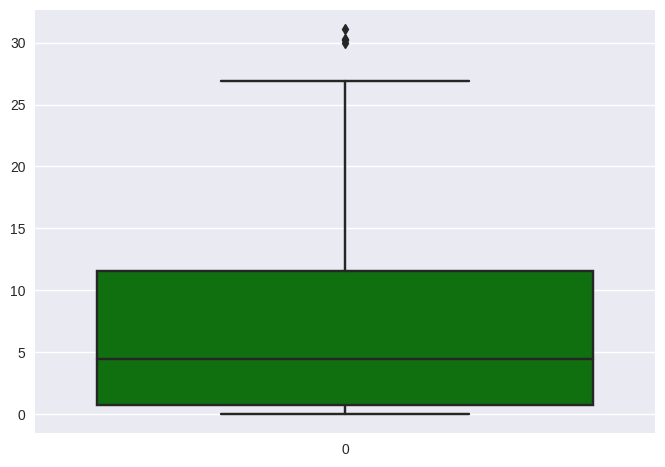

In [38]:
## Box plot
sns.boxplot(df['FWI'],color='green')

In [39]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'fire analysis of sidi- bel region')

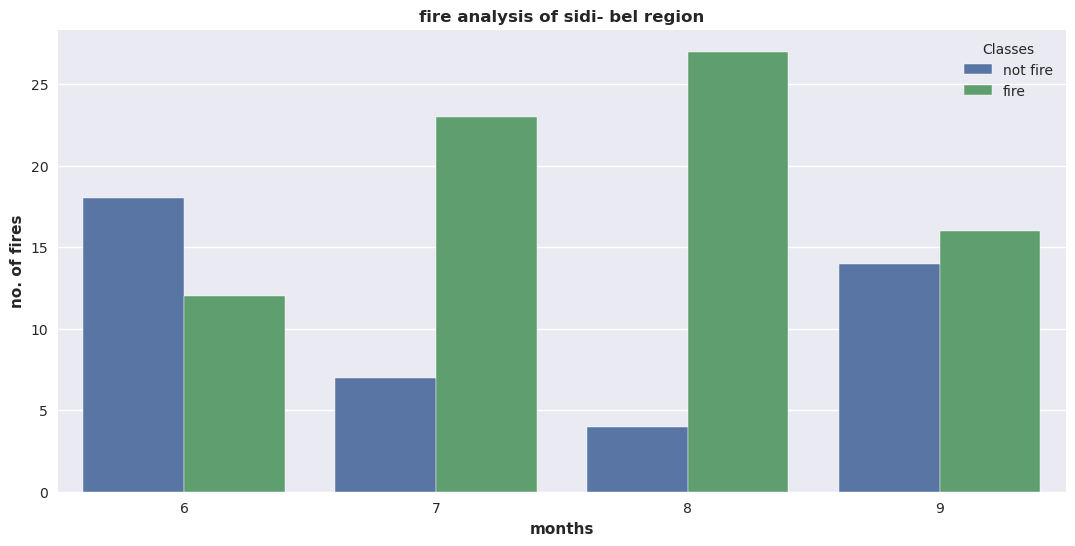

In [40]:
## Monthly Fire analysis
dftemp=df.loc[df["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('no. of fires', weight='bold')
plt.xlabel('months',weight='bold')
plt.title('fire analysis of sidi- bel region',weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

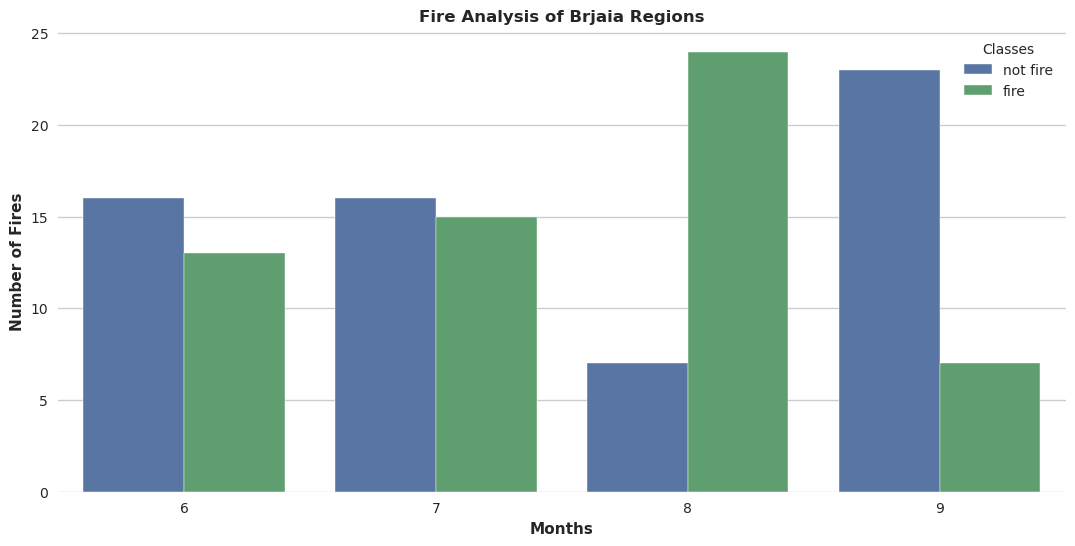

In [41]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

### Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

- Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

- Less Fires was on September



In [ ]:
## multicollinearity
